Cross sections extraction and visualization

In [2]:
#install required libraries if not installed by uncommenting it

#!pip install geopandas
#!pip install numpy
#!pip install pandas
#!pip install rasterio
#!pip install matplotlib



In [1]:
# import required libraries
import geopandas as gpd
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import os

In [2]:
def extract_and_visualize_cross_sections(cross_sections_shapefile, dem_raster, n_points=5, csv_output_dir='.', png_output_dir='.'):
    try:
        # Load cross_sections as a GeoDataFrame
        cross_sections = gpd.read_file(cross_sections_shapefile)

        for ind, row in cross_sections.iterrows():
            XS_ID = row['xs_id']
            # Starting and ending points of the cross-section line
            start_coords = list([row.geometry][0].coords)[0]
            end_coords = list([row.geometry][0].coords)[1]

            lon = [start_coords[0]]
            lat = [start_coords[1]]

            for i in np.arange(1, n_points + 1):
                x_dist = end_coords[0] - start_coords[0]
                y_dist = end_coords[1] - start_coords[1]
                point = [(start_coords[0] + (x_dist / (n_points + 1)) * i), (start_coords[1] + (y_dist / (n_points + 1)) * i)]
                lon.append(point[0])
                lat.append(point[1])

            lon.append(end_coords[0])
            lat.append(end_coords[1])

            # Dataframe using pandas library of latitude and longitude
            df = pd.DataFrame({'Latitude': lat, 'Longitude': lon})

            # create geodataframe with coordinate reference system
            gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
            gdf.crs = 'epsg:4326'

            # convert geographical coordinate reference system to projected coordinate reference system
            gdf_pcs = gdf.to_crs(epsg=3857)

            # horizontal distance
            gdf_pcs['h_distance'] = 0

            # Calculate horizontal distance
            for index, row in gdf_pcs.iterrows():
                gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])

            # Extracting the elevations from the DEM
            gdf_pcs['Elevation'] = 0

            # Open the DEM raster using rasterio
            dem = rasterio.open(dem_raster, mode='r')

            for index, row in gdf_pcs.iterrows():
                row, col = dem.index(row['Longitude'], row['Latitude'])
                dem_data = dem.read(1)
                gdf_pcs['Elevation'].loc[index] = dem_data[row, col]

            # Extract h_distance (x) and Elevation (y) columns into a Pandas DataFrame
            x_y_data = gdf_pcs[['h_distance', 'Elevation']]

            # Construct output file paths using os.path.join
            output_csv = os.path.join(csv_output_dir, f'{XS_ID}.csv')
            output_png = os.path.join(png_output_dir, f'{XS_ID}.png')

            # Save data in a CSV format
            x_y_data.to_csv(output_csv)

            # Creating plots for each cross-sectional profile
            plt.plot(gdf_pcs['h_distance'], gdf_pcs['Elevation'])
            plt.xlabel('Distance (m)')
            plt.ylabel('Elevation (m)')
            plt.grid(True)
            plt.title(XS_ID)
            plt.savefig(output_png)
            plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1451.9056722461858' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

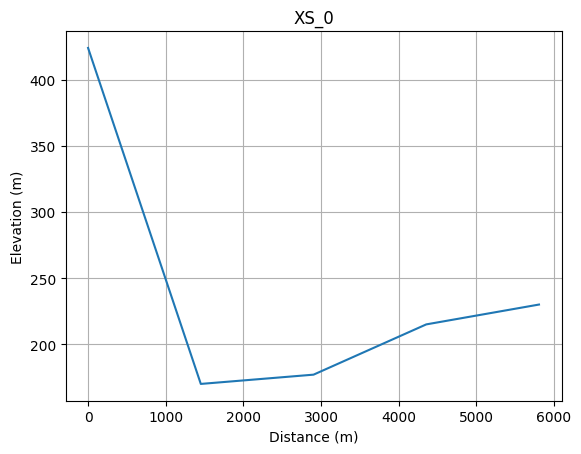

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1553.1911824630936' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

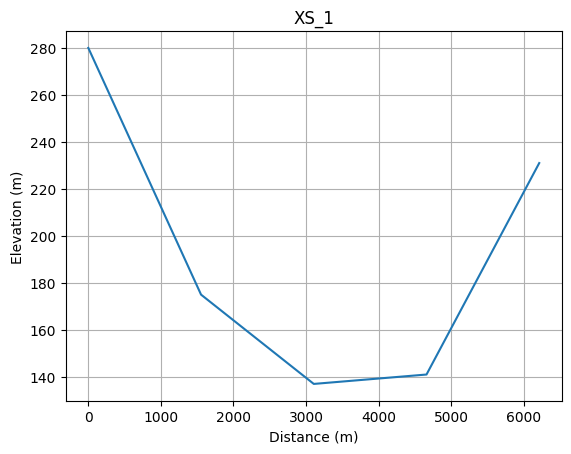

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1191.173664945956' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

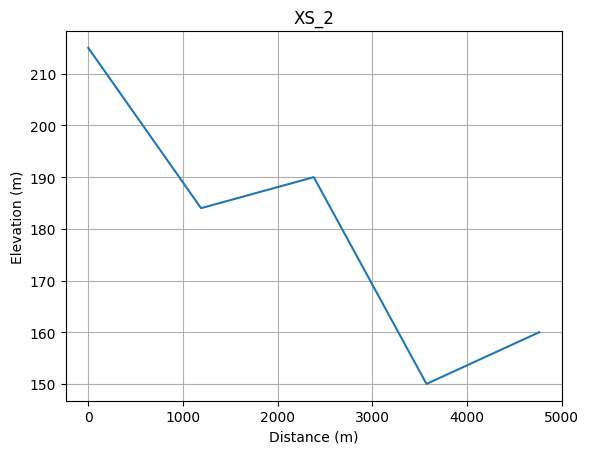

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1184.0871379704208' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

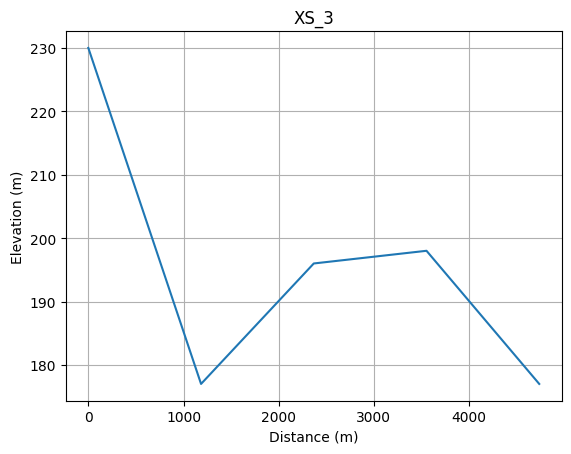

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1041.0374118856419' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

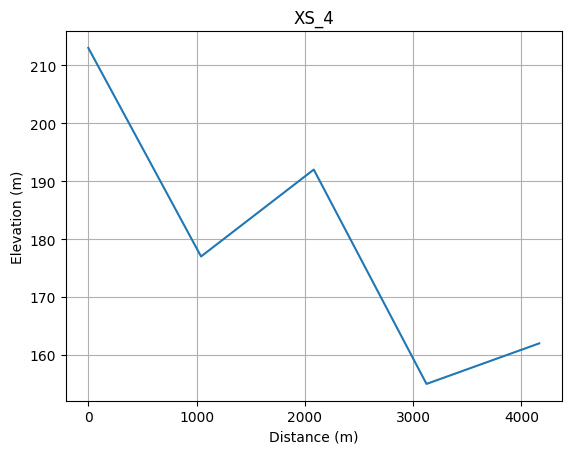

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '755.1723678280583' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

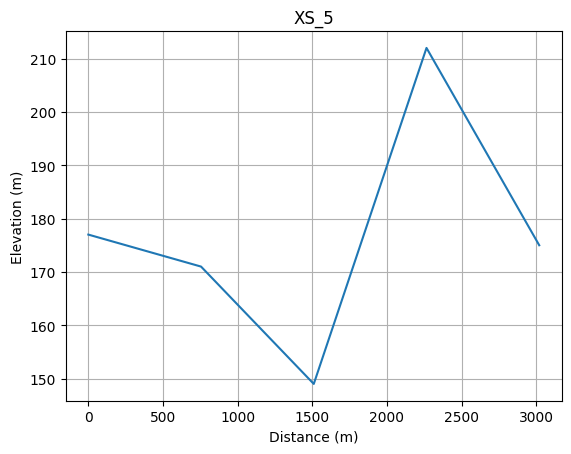

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '718.0971368308213' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

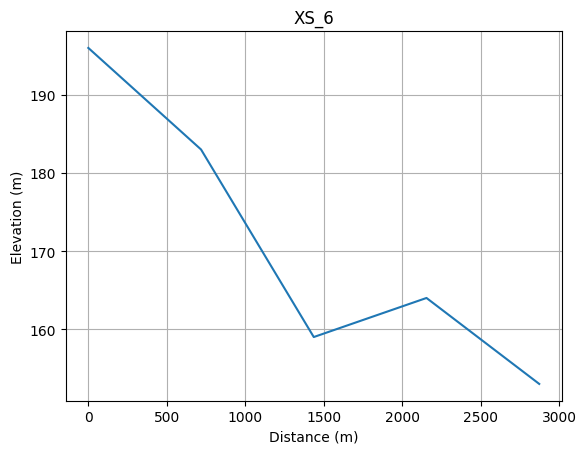

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '956.6668901526558' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

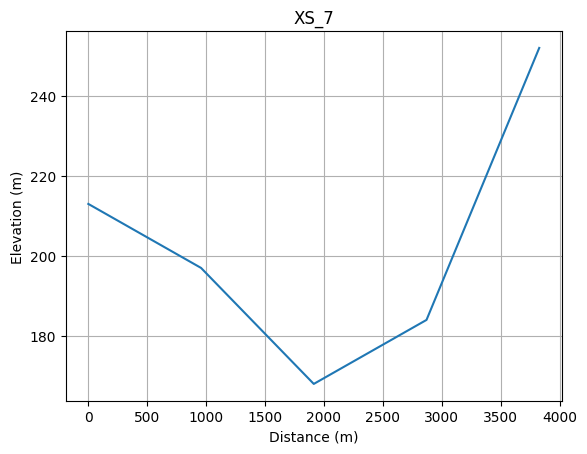

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '696.4625515950202' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

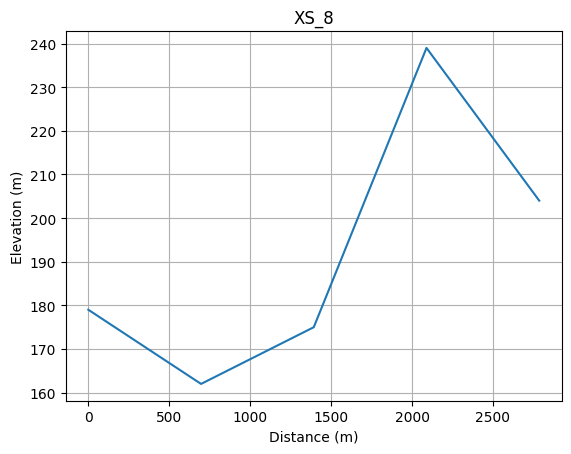

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1136.7442621184186' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

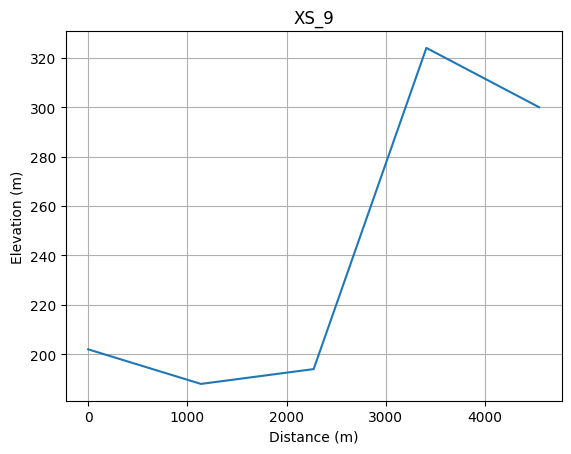

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1087.548704834873' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

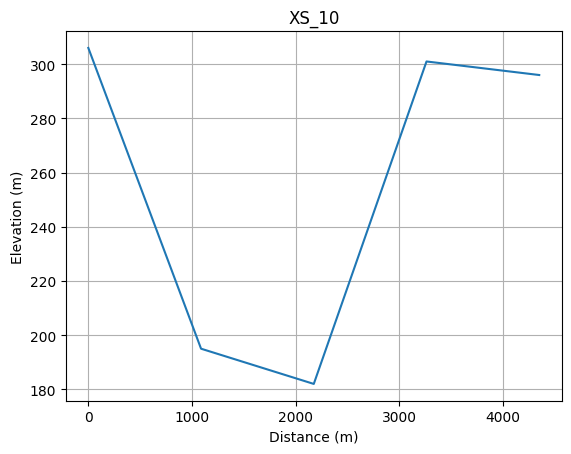

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '938.0029612887008' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

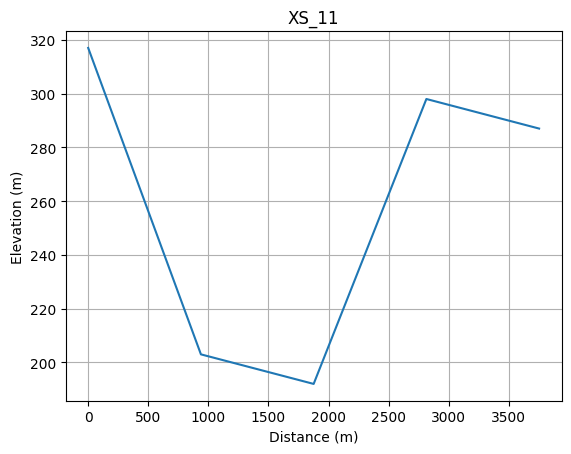

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1063.2530955256336' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

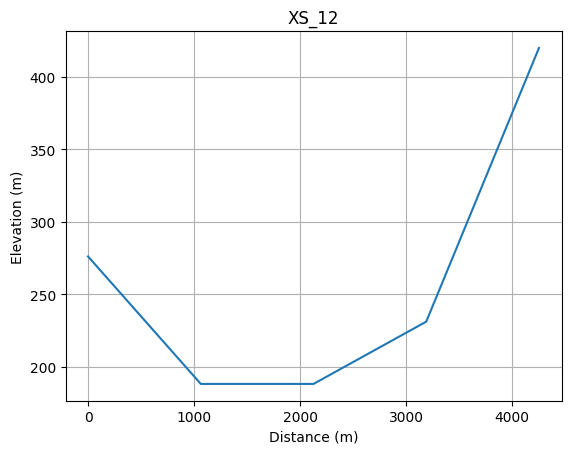

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '872.8997372094261' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

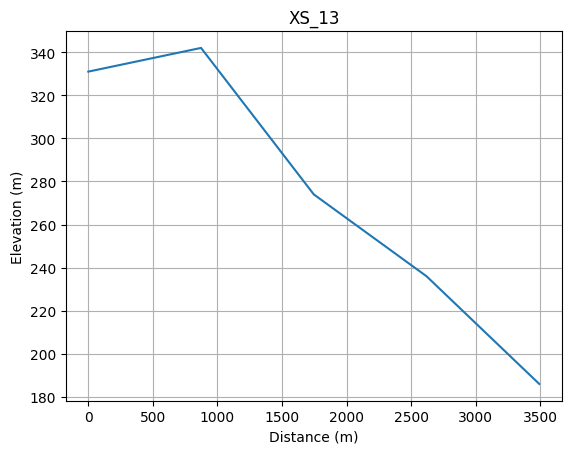

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1000.1054274960403' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

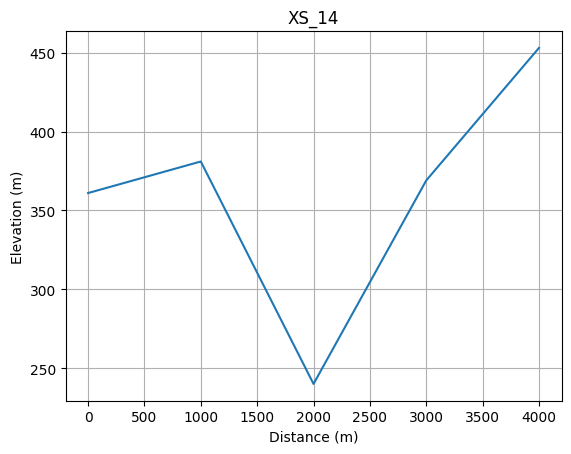

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1148.3426965085052' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

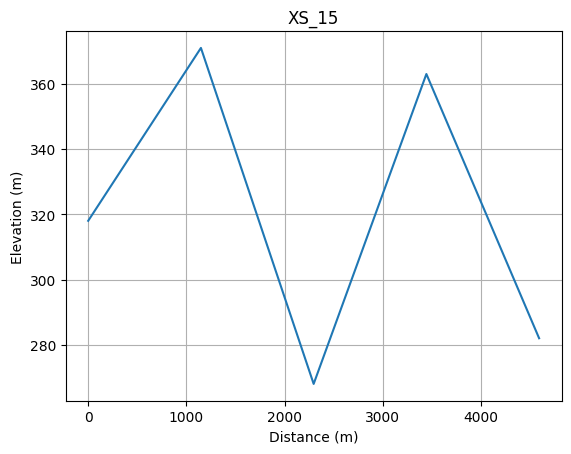

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '797.9447148940566' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

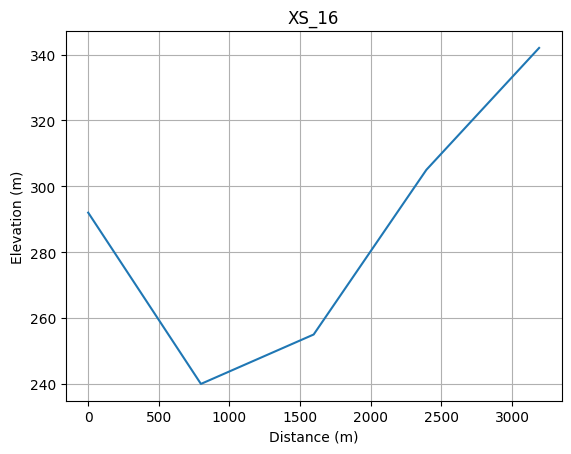

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1084.7881800895757' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

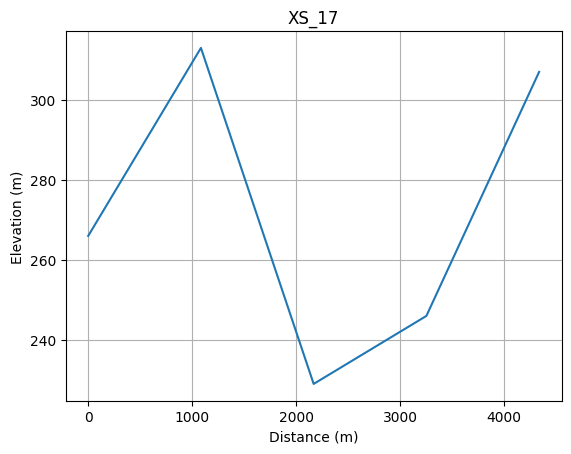

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1163.3337519933932' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

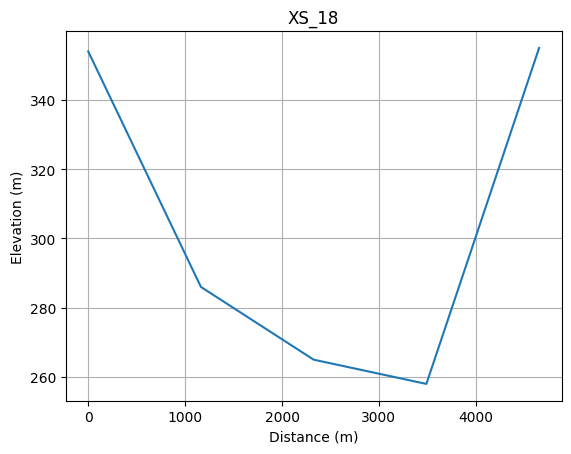

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '856.5204884747316' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

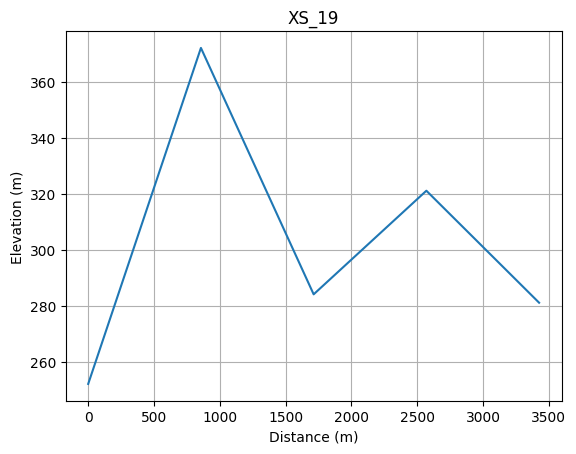

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1058.5214173978616' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

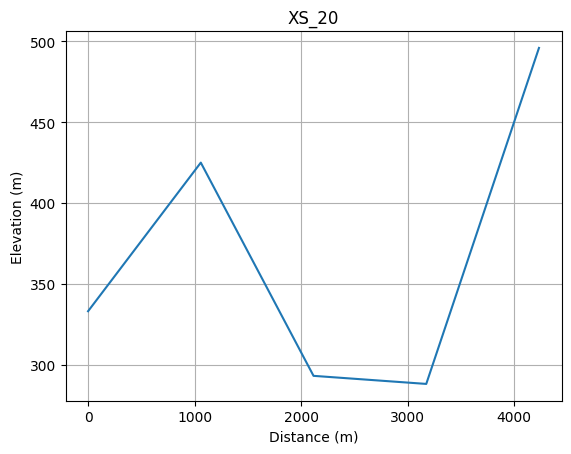

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1030.4645058750236' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

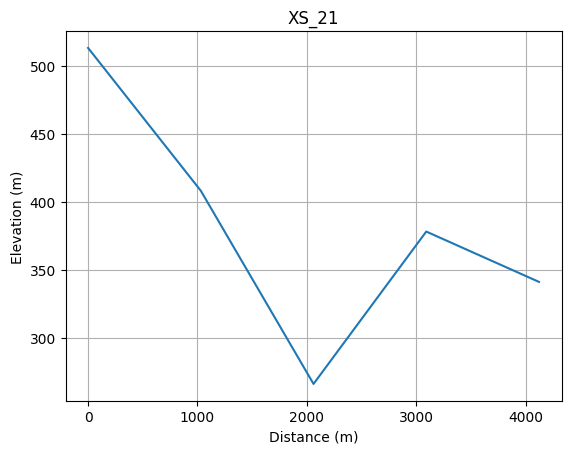

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '992.064585535342' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

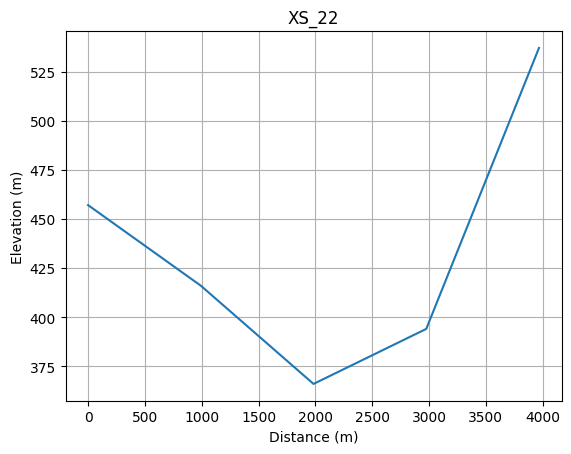

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '854.1376551153468' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

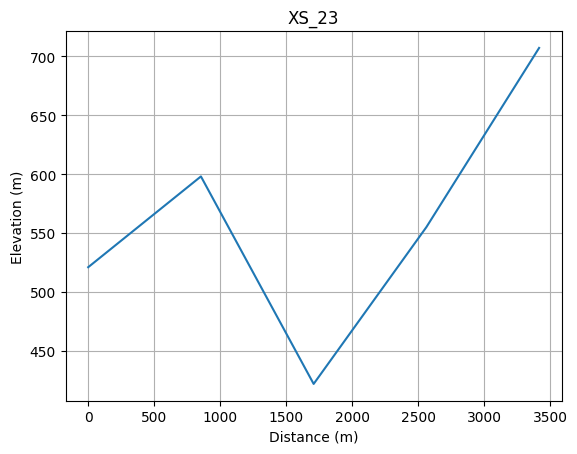

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '857.3377480905283' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

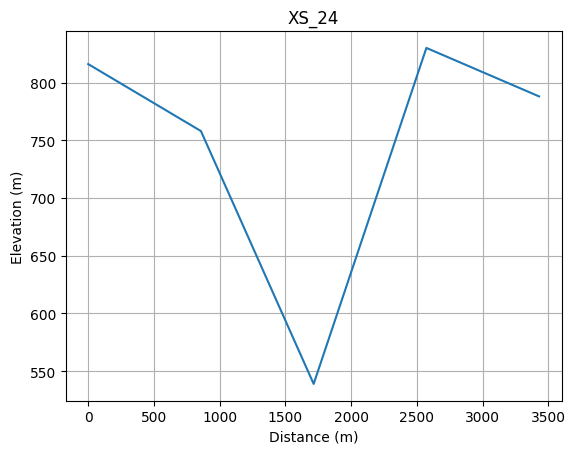

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '888.6411541036889' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

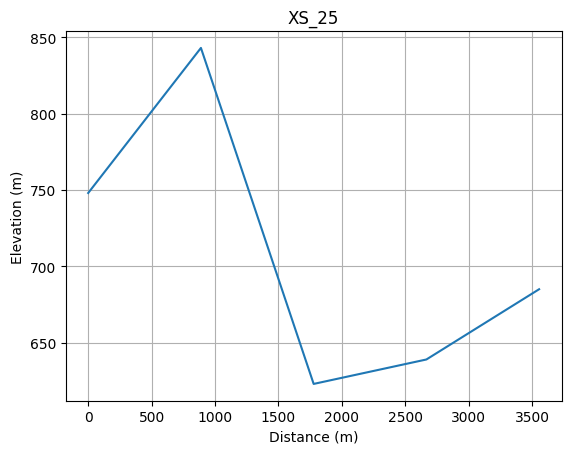

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '867.0791816434357' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

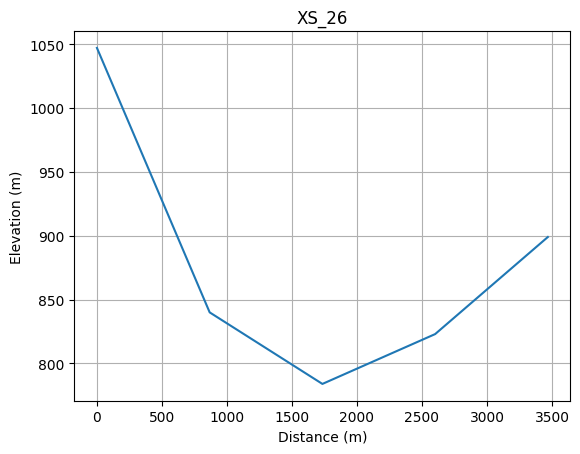

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '572.0854148858932' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

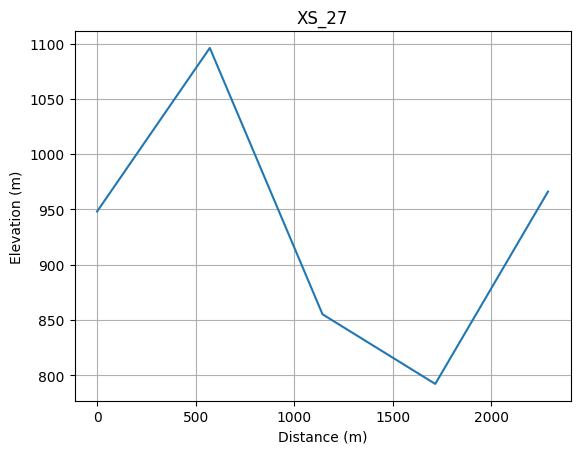

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '679.5217835364731' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

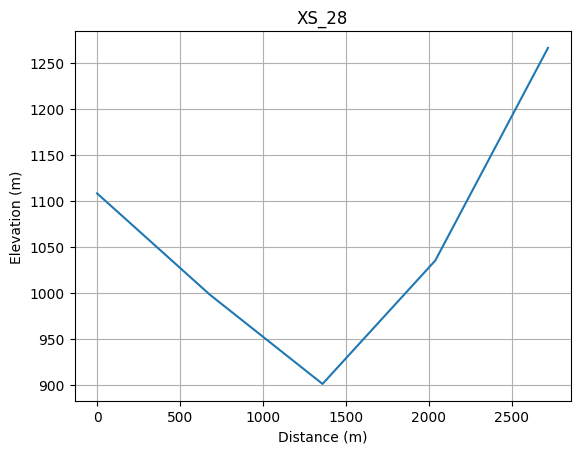

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '856.9245551723875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

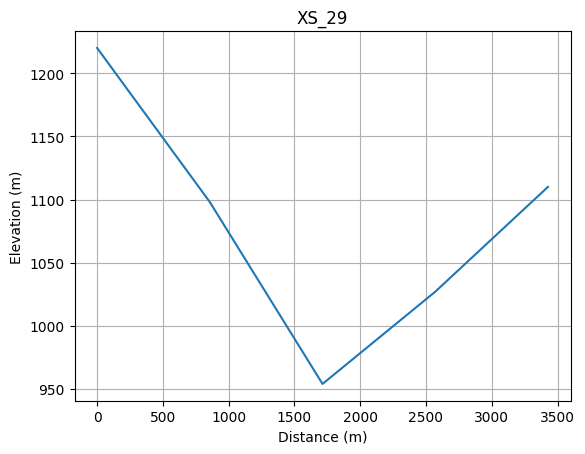

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '800.6963478233928' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

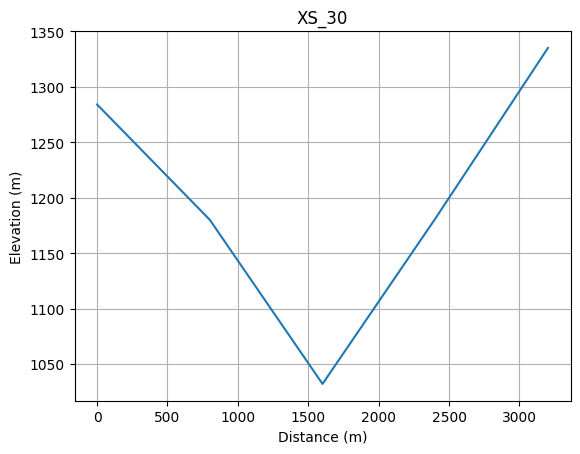

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1006.7793930653381' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

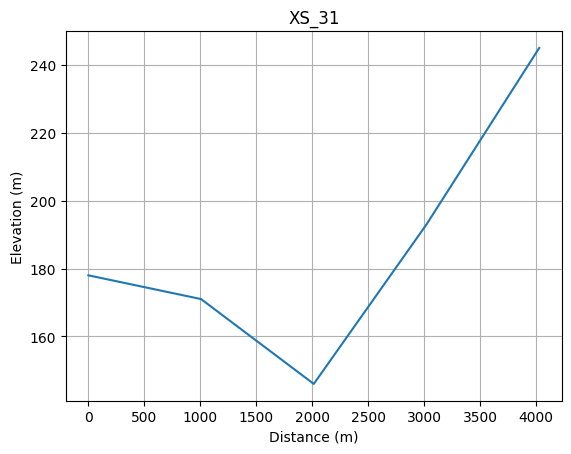

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1261.7979738363535' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

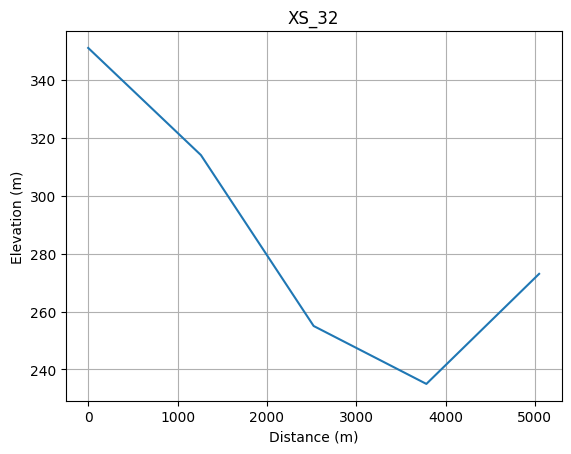

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1258.452073191309' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

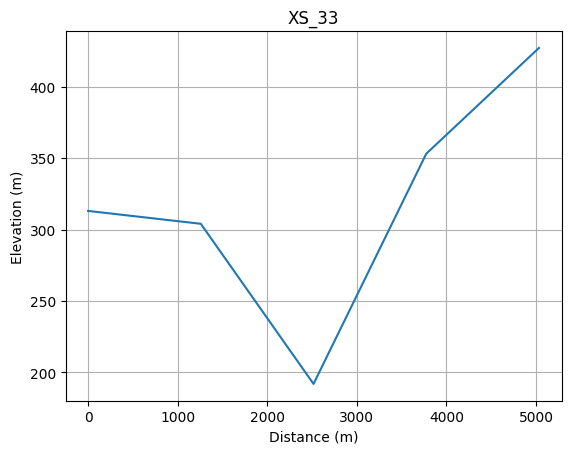

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1082.1301513468677' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

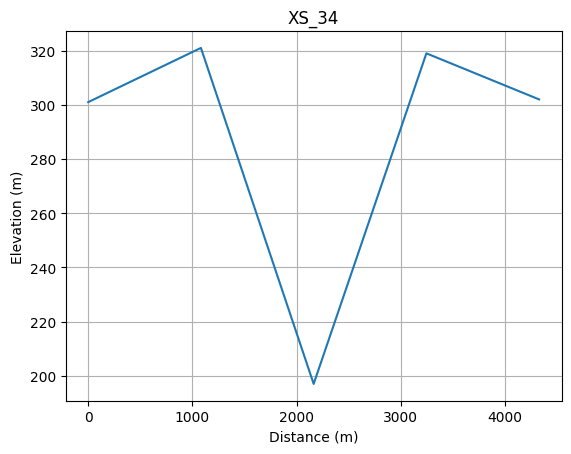

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '952.4937951914516' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

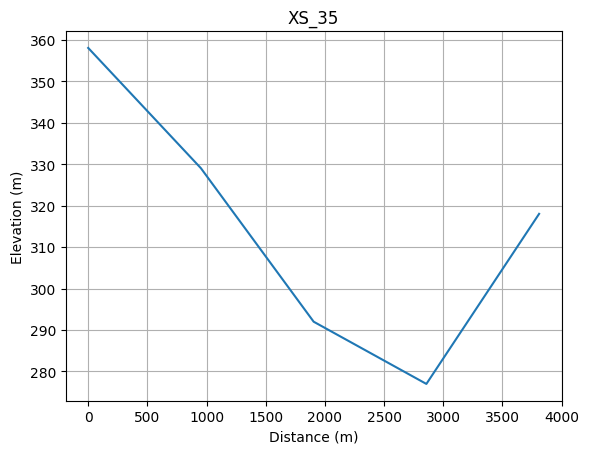

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '766.7902980021033' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

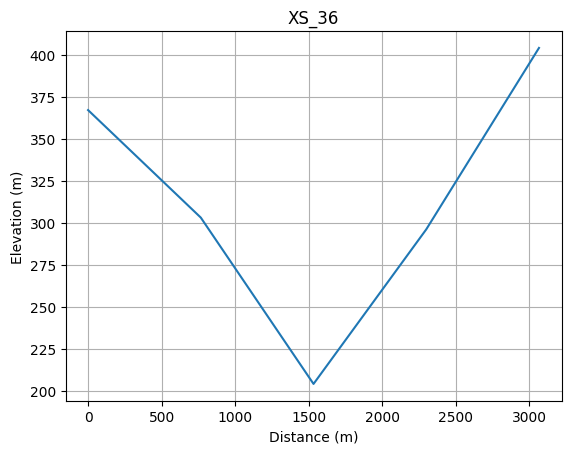

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '985.4195079155535' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

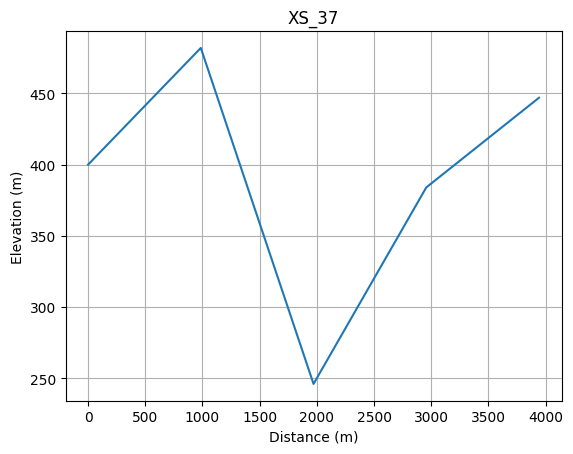

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '987.3416985001278' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

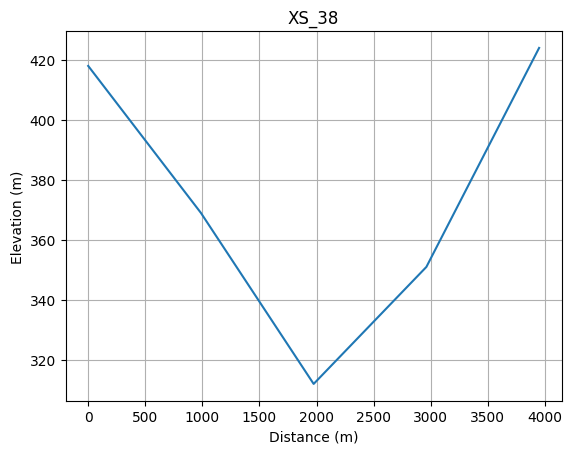

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1027.3110299248433' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

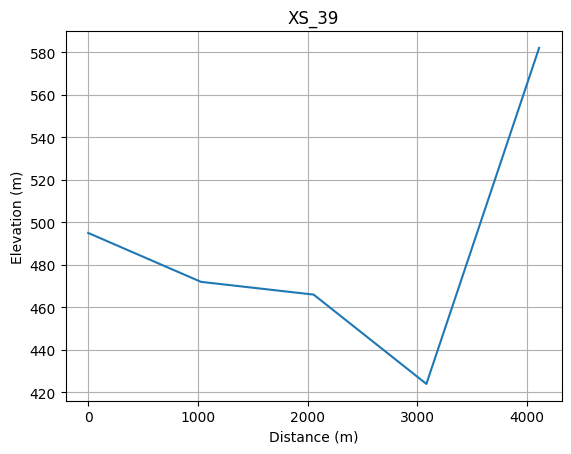

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1116.5046492539016' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

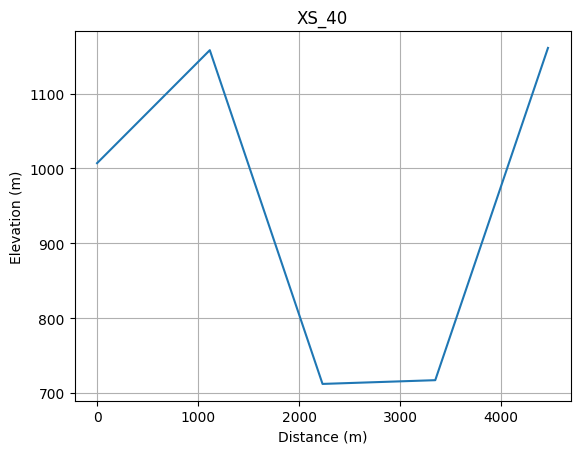

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '833.0781467166964' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

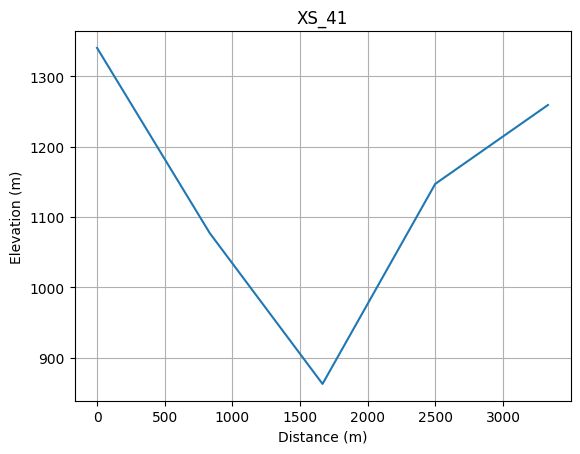

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '672.8531636545486' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

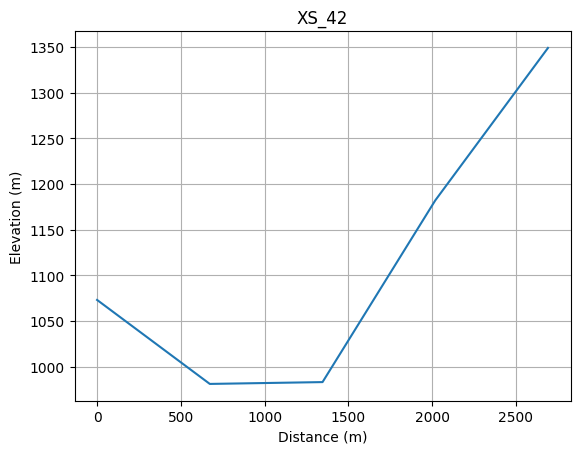

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '908.5426133729377' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

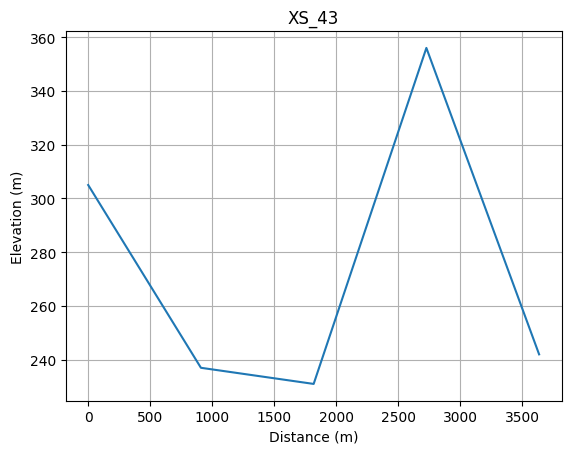

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '989.1895763249132' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

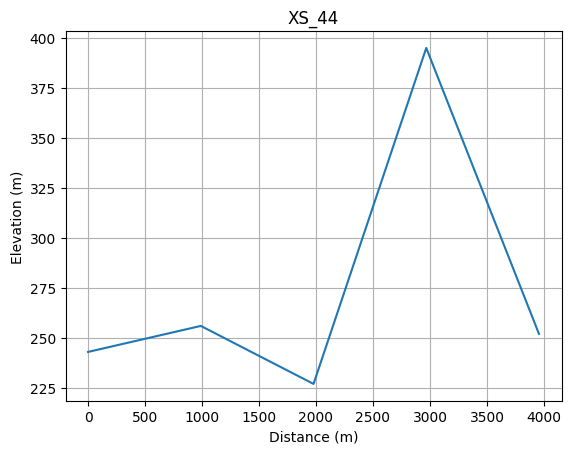

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '614.5497285439388' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

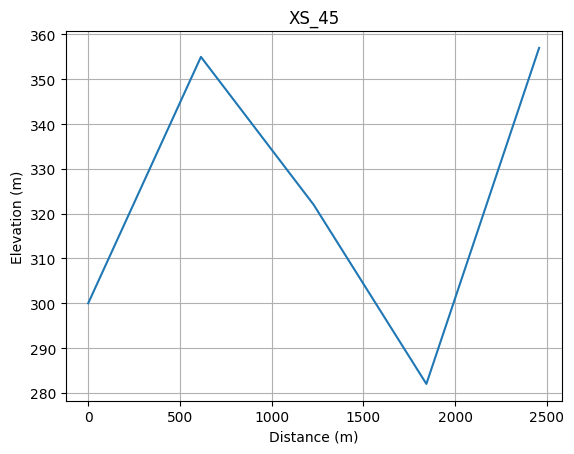

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '691.368163326387' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

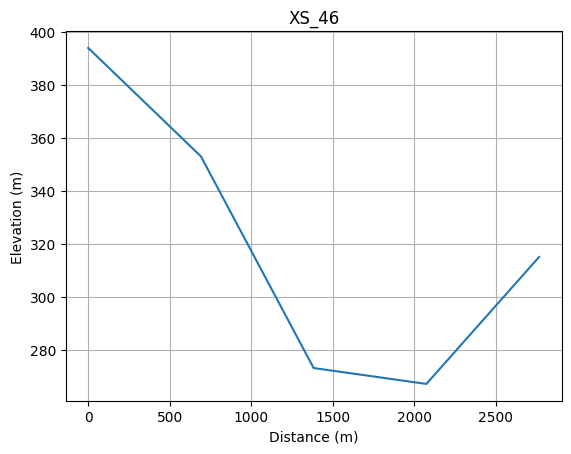

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '785.1390874170476' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

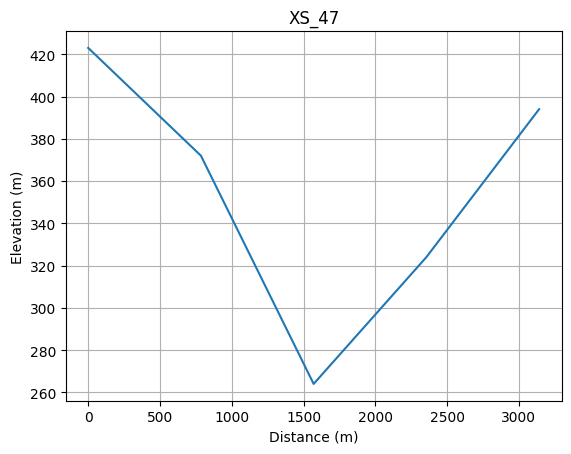

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '667.5812555690741' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

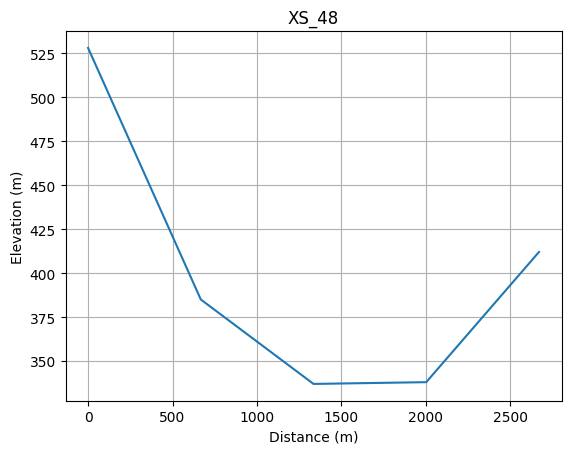

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '648.0960286929235' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

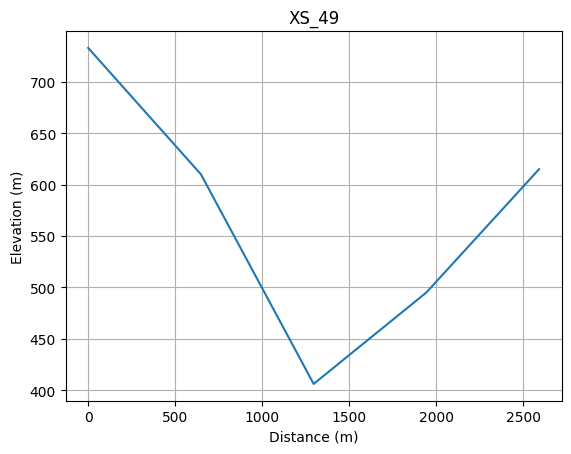

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '596.8747230545732' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

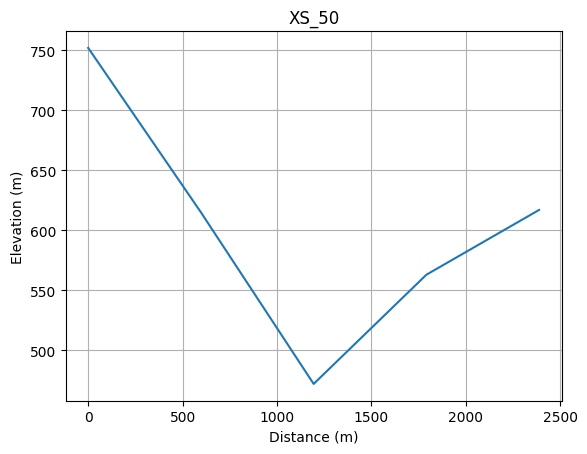

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '673.8920107270278' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

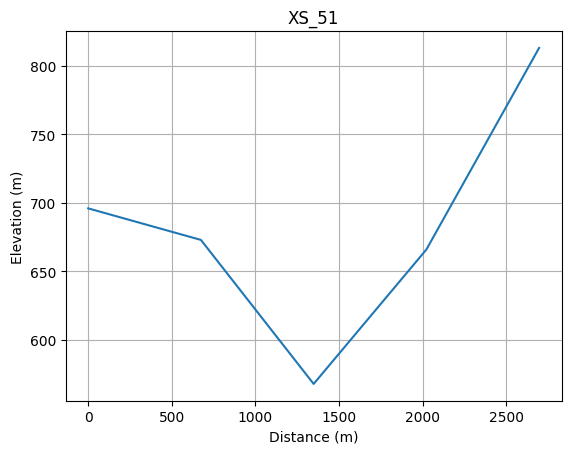

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '615.3045072826216' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

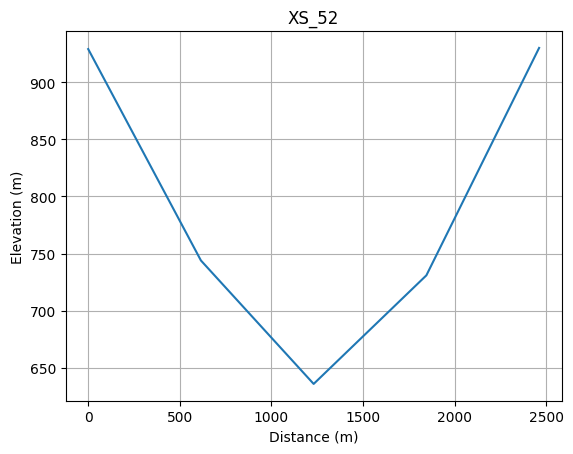

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '616.4773066342491' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

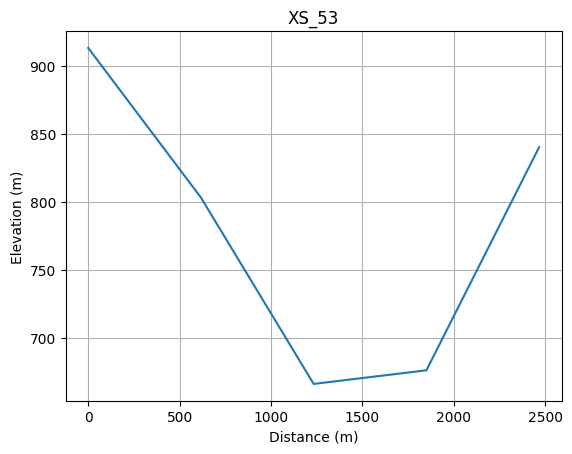

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '639.0825302823465' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

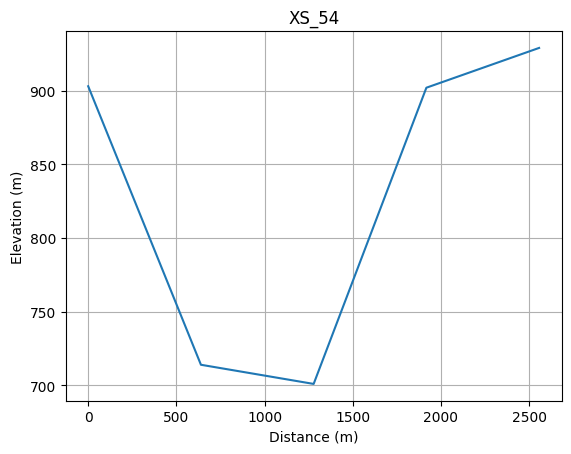

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '552.3564903839957' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

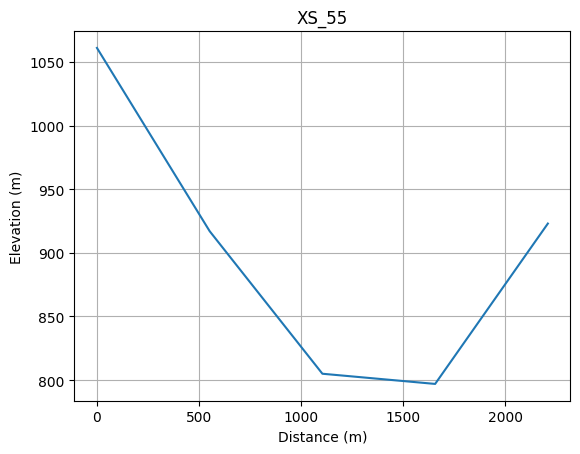

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '520.4988513925778' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

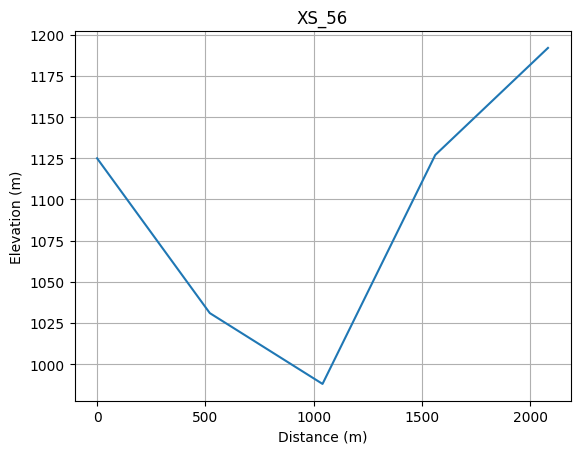

C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '582.9639422102993' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_pcs['h_distance'].loc[index] = gdf_pcs.geometry[0].distance(gdf_pcs.geometry[index])
C:\Users\97798\AppData\Local\Temp\ipykernel_21916\3122455368.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

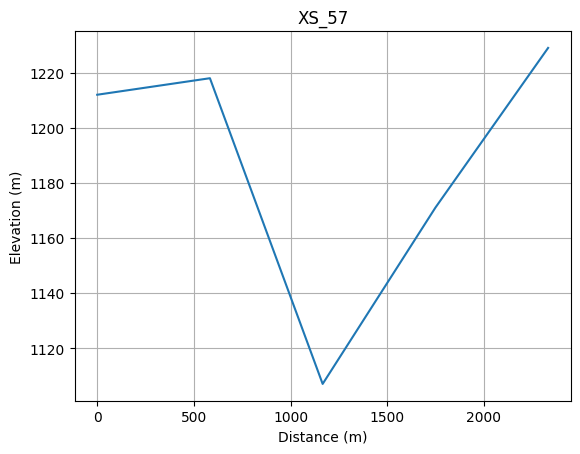

In [3]:
# Example usage:function name then give the location of cross sections shapefile, then location of DEM file, number of points,csv output directory location, png output directory location
# for example: extract_and_visualize_cross_sections('D:\GY539_FinalProject\CrossSectionExtractionVisualization\Data\Shapefiles\Cross sections.shp', 'D:\GY539_FinalProject\CrossSectionExtractionVisualization\Data\DEM.tif', n_points=3, csv_output_dir='D:\GY539_FinalProject\CrossSectionExtractionVisualization\Samples', png_output_dir='D:\GY539_FinalProject\CrossSectionExtractionVisualization\Samples')

extract_and_visualize_cross_sections('D:\OneDrive - The University of Alabama\Class Work\Fall 2023\GY539\Class\GY539_FinalProject\CrossSectionExtractionVisualization\Data\Shapefiles\Cross sections.shp', 'D:\OneDrive - The University of Alabama\Class Work\Fall 2023\GY539\Class\GY539_FinalProject\CrossSectionExtractionVisualization\Data\DEM.tif', n_points=3, csv_output_dir='D:\OneDrive - The University of Alabama\Class Work\Fall 2023\GY539\Class\GY539_FinalProject\CrossSectionExtractionVisualization\Samples', png_output_dir='D:\OneDrive - The University of Alabama\Class Work\Fall 2023\GY539\Class\GY539_FinalProject\CrossSectionExtractionVisualization\Samples')